In [49]:
import pandas
import matplotlib.pyplot as plt
import scipy
import numpy
import matplotlib
import sklearn
import sys

from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [50]:
# Iris identification problem

# 1. Define the problem
# 2. Prepare the data
# 3. Evaluate algorithms
# 4. Improve results
# 5. Present the results

In [51]:
# check versions of all packages

print("Python: {}".format(sys.version))
print("scipy: {}".format(scipy.__version__))
print("numpy: {}".format(numpy.__version__))
print("matplotlib:{}".format(matplotlib.__version__))
print("pandas: {}".format(pandas.__version__))
print("sklearn: {}".format(sklearn.__version__))

Python: 3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 16:07:46) [MSC v.1900 32 bit (Intel)]
scipy: 1.1.0
numpy: 1.14.3
matplotlib:2.2.2
pandas: 0.23.3
sklearn: 0.19.1


In [62]:
# load the dataset

url = "./iris_data.txt"
names = ['septal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

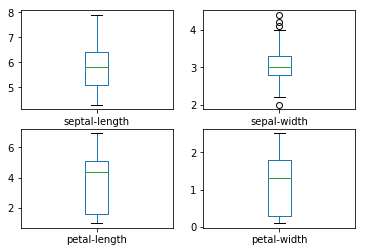

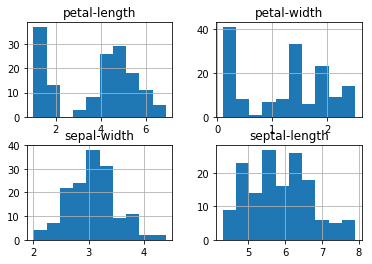

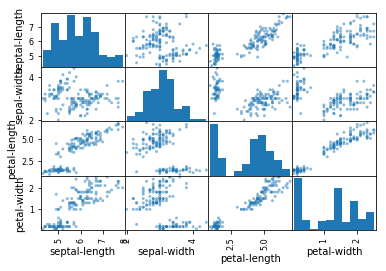

In [101]:
# looking at dimensions of the data
# print(dataset.shape)
# print(dataset.head(20))
# print(dataset.describe())
# print(dataset.groupby('class').size())

# To gain an understanding of the data we look at 2 plots
# 1. univariate plots to understand each attribute
#    given that each input variables are numeric, we can create a box and whisker plots of each attribute
#    we can also create a histogram of each imput variable
# 2. multivariant plots to better understand ther relationships between arrtibutes
#    scatter plot matrix
# univariate
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
dataset.hist()
plt.show()
# two of the plots have a Gaussian distribution (normal), this can be useful to know as we can use algorithms that will explot this assumption

# multivariate
scatter_matrix(dataset)
plt.show()
# Note the diagonal grouping of some pairs of attributes. This suggest a high correlation and a predictable relationship


In [102]:
# 5. Evaluate some algorithms
#   a. seperate out a validation dataset
#   b. set-up the test harness to use 10-fold cross validation
#   c. build 5 different models to predict the species from flower measurements
#   d. select the best model

In [146]:
# a. Seperating out a validation set
#    80% to train the model and 20% to be used as a validation set

# create array
array = dataset.values

# creating 2 arrays with 4 columns and one with class only
x = array[:,0:4]
y = array[:,4]

validation_size = 0.20
seed = 7

x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x,y, test_size=validation_size, random_state=seed)

# _train used for preparing the models
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [148]:
# Setting up a test harness
#   this will split the dataset into 10 parts, train on 9 of
#   them and test on 1 of them and repeat for all combinations
#   of test-train splits
# test options and evaluation metric
# the metric 'accuracy' is used to evaluate models
# this is the ratio of the number of correctly predicted instances
# in divided by the total number of instances in the dataset 
# and multiplied by 100 to give a percentage 
seed = 7
scoring = 'accuracy'


In [172]:
# c. Building a model
#    You know know which alogrithms will be good on this
#    problem or what configurations to use, but the graphs above
#    indicate some of the classes are partialy linearly separable
#    in some dimensions, so we are expecting generally good results

# going to evaluate 6 different algorithms
# 1. Logsitic regression (LR)
# 2. Linear Discriminant Analysis (LDA)
# 3. K-Nearest Neighbors (KNN)
# 4. Classification and Regression Trees (CART)
# 5. Guassian Naive Bayes (NB)
# 6. Support Vector Machines

# LR and LDA are simple linear algorithms 
# KNN, CART, NB and SVM are non linear algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' %(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


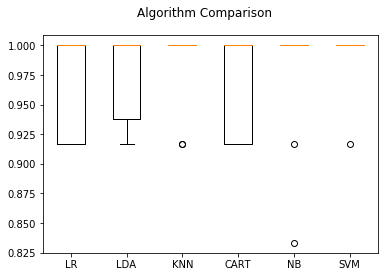

In [175]:
# Can create a plot of the model evaluation results and compare
# the spread and the mean accuracy of each model. There is a 
# population of accuracy measures for each algorithm because
# each algorithm was evaluated 10 times (10 fold cross validation)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



In [179]:
# Making predictions
# Want to get an idea of accuracy based on the validation set
# This is important for issues whih may arise during training
# such as overfitting to dataset or a data leak
# Make predictions on valdation dataset 
#  run KNN model directly on the validation set and summarise 
#  the seualy as a final accruacy score. a confusion matrix and
#  a classsification report

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_validation)

print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))


0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

